In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from skimage import color
from skimage import io

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

In [2]:
def load_data(path):
    """ Helper function for loading a MAT-File"""
    data = loadmat(path)
    return data['X'], data['y']

X_train, y_train = load_data('train_32x32.mat')
X_test, y_test = load_data('test_32x32.mat')

print("Training Set", X_train.shape, y_train.shape)
print("Test Set", X_test.shape, y_test.shape)

Training Set (32, 32, 3, 73257) (73257, 1)
Test Set (32, 32, 3, 26032) (26032, 1)


In [3]:
# Transpose the image arrays
X_train, y_train = X_train.transpose((3,0,1,2)), y_train[:,0]
X_test, y_test = X_test.transpose((3,0,1,2)), y_test[:,0]

print("Training Set", X_train.shape)
print("Test Set", X_test.shape)
print('')

# Calculate the total number of images
num_images = X_train.shape[0] + X_test.shape[0]

print("Total Number of Images", num_images)

Training Set (73257, 32, 32, 3)
Test Set (26032, 32, 32, 3)

Total Number of Images 99289


In [4]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

In [5]:
#flat -> A 1-D iterator over the array given (using the index in that array)

#enumerate -> Will make certain loops a bit clearer

def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols) #create a fig and a set of subplots
    for i, ax in enumerate(axes.flat):  
        if img[i].shape == (32, 32, 3): #checks for the shape of every image
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:,0]) #even if the image dimensions is diff, just plots the image
        ax.set_xticks([]); ax.set_yticks([]) #tells the location where to plot the image
        ax.set_title(labels[i]) #returns the label from "y_train" for each image of "X_train"

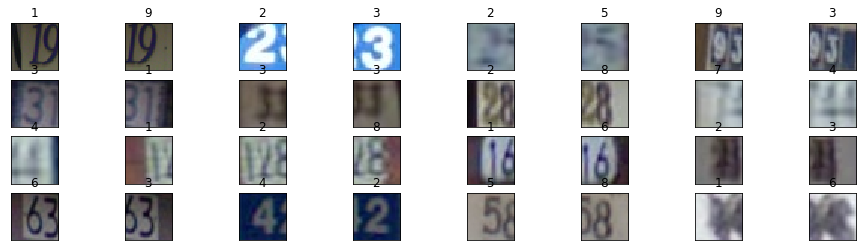

In [6]:
# Plot some training set images
plot_images(X_train, y_train, 4, 8)

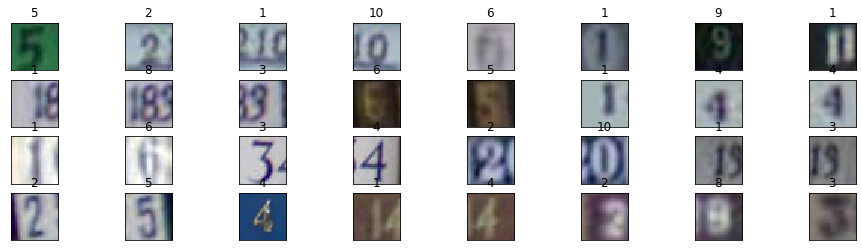

In [7]:
# Plot some test set images
plot_images(X_test, y_test, 4, 8)

In [8]:
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

In [9]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Train on 73257 samples, validate on 26032 samples
Epoch 1/10
73257/73257 [==============================] - 130s 2ms/sample - loss: 0.8877 - accuracy: 0.7131 - val_loss: 0.5213 - val_accuracy: 0.8484
Epoch 2/10
73257/73257 [==============================] - 178s 2ms/sample - loss: 0.4216 - accuracy: 0.8762 - val_loss: 0.4323 - val_accuracy: 0.8755
Epoch 3/10
73257/73257 [==============================] - 122s 2ms/sample - loss: 0.3548 - accuracy: 0.8959 - val_loss: 0.3982 - val_accuracy: 0.8865
Epoch 4/10
73257/73257 [==============================] - 120s 2ms/sample - loss: 0.3147 - accuracy: 0.9069 - val_loss: 0.3733 - val_accuracy: 0.8932
Epoch 5/10
73257/73257 [==============================] - 633s 9ms/sample - loss: 0.2868 - accuracy: 0.9155 - val_loss: 0.3573 - val_accuracy: 0.8983
Epoch 6/10
73257/73257 [==============================] - 125s 2ms/sample - loss: 0.2647 - accuracy: 0.9211 - val_loss: 0.3501 - val_accuracy: 0.9005
Epoch 7/10
73257/73257 [==========================

26032/1 - 18s - loss: 0.2848 - accuracy: 0.9028


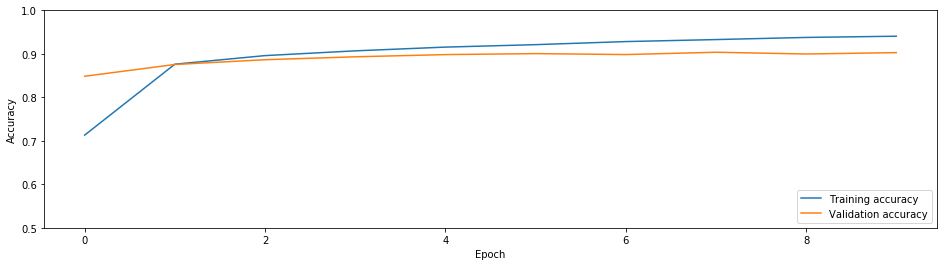

In [14]:
# Training vs validation accuracy:

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [15]:
print(test_acc)

0.90281194


Our simple CNN has achieved a test accuracy of over 90%.

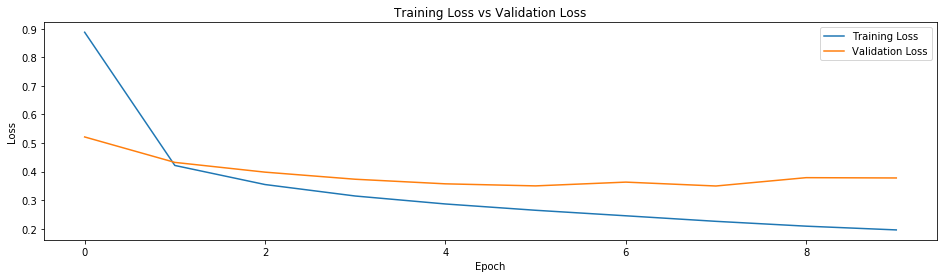

In [16]:
# Training vs validation loss:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

In [22]:
from keras.layers import Dropout
model2 = models.Sequential()

model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))

model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Dropout(0.25))

model2.add(layers.Flatten())

model2.add(layers.Dense(128, activation='relu'))

model2.add(layers.Dropout(0.5))

model2.add(layers.Dense(10, activation='softmax'))

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit(X_train, y_train, epochs=30, batch_size = 256, 
                    validation_data=(X_test, y_test))

Train on 73257 samples, validate on 26032 samples
Epoch 1/30
73257/73257 [==============================] - 307s 4ms/sample - loss: 1.3507 - accuracy: 0.5577 - val_loss: 0.6806 - val_accuracy: 0.8017
Epoch 2/30
73257/73257 [==============================] - 296s 4ms/sample - loss: 0.7554 - accuracy: 0.7699 - val_loss: 0.5828 - val_accuracy: 0.8302
Epoch 3/30
73257/73257 [==============================] - 312s 4ms/sample - loss: 0.6694 - accuracy: 0.7941 - val_loss: 0.5418 - val_accuracy: 0.8402
Epoch 4/30
73257/73257 [==============================] - 271s 4ms/sample - loss: 0.6121 - accuracy: 0.8124 - val_loss: 0.5167 - val_accuracy: 0.8476
Epoch 5/30
73257/73257 [==============================] - 284s 4ms/sample - loss: 0.5700 - accuracy: 0.8239 - val_loss: 0.4978 - val_accuracy: 0.8530
Epoch 6/30
73257/73257 [==============================] - 284s 4ms/sample - loss: 0.5436 - accuracy: 0.8317 - val_loss: 0.4880 - val_accuracy: 0.8589
Epoch 7/30
73257/73257 [==========================

26032/1 - 33s - loss: 0.3728 - accuracy: 0.8859


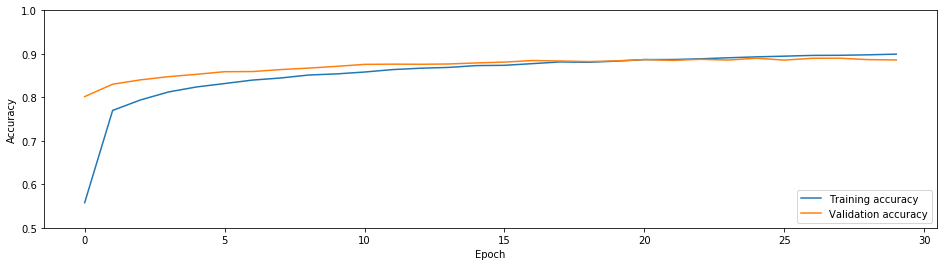

In [25]:
# Training vs validation accuracy:

plt.plot(history2.history['accuracy'], label='Training accuracy')
plt.plot(history2.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(X_test,  y_test, verbose=2)

In [26]:
print(test_acc)

0.8859097


In [27]:
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [40]:
    model3 = models.Sequential()

    model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model3.add(layers.Conv2D(32, (3, 3), activation='relu'))
                             
    model3.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model3.add(layers.Conv2D(64, (3, 3), activation='relu'))

    model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model3.add(layers.Dropout(0.2))
    model3.add(layers.Flatten())

    model3.add(layers.BatchNormalization(epsilon=0.001, axis=-1, momentum=0.99, weights=None, beta_initializer='zero',  gamma_regularizer=None, beta_regularizer=None))
    model3.add(layers.Activation('relu'))
    model3.add(layers.BatchNormalization(epsilon=0.001, axis=-1, momentum=0.99, weights=None, beta_initializer='zero',  gamma_regularizer=None, beta_regularizer=None))
    model3.add(layers.Activation('relu'))

    model3.add(layers.Dense(1024))
    model3.add(layers.Activation('relu'))
    model3.add(layers.Dropout(0.2))
    model3.add(layers.Dense(10))
    model3.add(layers.Activation('softmax'))
    
    model3.compile(loss='sparse_categorical_crossentropy',
                  optimizer="adam",
                  metrics=['accuracy'])


    datagen = ImageDataGenerator(
    featurewise_center=False,  # Set input mean to 0 over the dataset
    samplewise_center=False,  # Set each sample mean to 0
    featurewise_std_normalization=False,  # Divide inputs by std of the dataset
    samplewise_std_normalization=False,  # Divide each input by its std
    zca_whitening=False,  # Apply ZCA whitening
    rotation_range=5,  # Randomly rotate images in the range (0 to 180 degrees)
    width_shift_range=0.1,  # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # Randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # Randomly flip images
    vertical_flip=False)  # Randomly flip images

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(X_train)

    # Fit the model on the batches generated by datagen.flow().
    history3 = model3.fit_generator(datagen.flow(X_train, y_train,
                                    batch_size=256), steps_per_epoch=None, epochs=40,
                                    validation_data=(X_test, y_test))

Epoch 1/40
287/287 [==============================] - 713s 2s/step - loss: 1.1143 - accuracy: 0.6428 - val_loss: 2.1542 - val_accuracy: 0.2598
Epoch 2/40
287/287 [==============================] - 737s 3s/step - loss: 0.5883 - accuracy: 0.8172 - val_loss: 1.2261 - val_accuracy: 0.6269
Epoch 3/40
287/287 [==============================] - 800s 3s/step - loss: 0.4824 - accuracy: 0.8512 - val_loss: 0.4553 - val_accuracy: 0.8742
Epoch 4/40
287/287 [==============================] - 771s 3s/step - loss: 0.4223 - accuracy: 0.8706 - val_loss: 0.3071 - val_accuracy: 0.9131
Epoch 5/40
287/287 [==============================] - 664s 2s/step - loss: 0.3863 - accuracy: 0.8823 - val_loss: 0.3339 - val_accuracy: 0.9050
Epoch 6/40
287/287 [==============================] - 862s 3s/step - loss: 0.3621 - accuracy: 0.8895 - val_loss: 1.7104 - val_accuracy: 0.7124
Epoch 7/40
287/287 [==============================] - 945s 3s/step - loss: 0.3406 - accuracy: 0.8975 - val_loss: 0.2384 - val_accuracy: 0.9348

26032/1 - 41s - loss: 0.1046 - accuracy: 0.9504


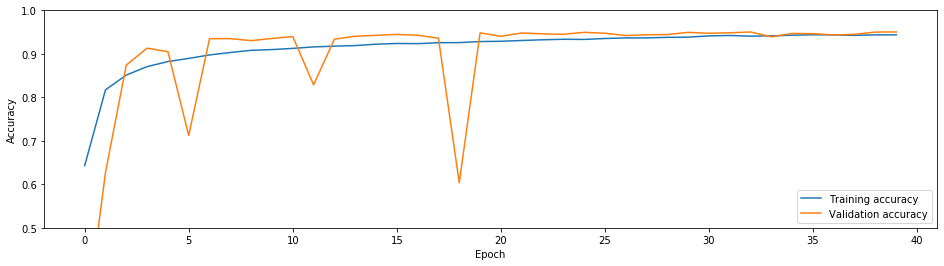

In [41]:
# Training vs validation accuracy:

plt.plot(history3.history['accuracy'], label='Training accuracy')
plt.plot(history3.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model3.evaluate(X_test,  y_test, verbose=2)

In [42]:
print(test_acc)

0.95036876
